# Introduction à PyTorch : Réalisez vos Idées en Intelligence Artificielle

PyTorch est un framework open-source populaire et puissant développé par Facebook AI, spécialement conçu pour le développement d'applications d'intelligence artificielle (IA), d'apprentissage profond et de calcul scientifique en Python. Il offre une approche flexible et dynamique pour la création de modèles d'apprentissage profond, ce qui en fait un choix privilégié pour les chercheurs et les développeurs travaillant dans le domaine de l'IA.

## Principales Caractéristiques :

***Tenseurs Dynamiques*** : PyTorch se distingue par son approche basée sur des tenseurs dynamiques. Cela signifie que les calculs sont effectués à la volée, ce qui permet des opérations plus flexibles et une meilleure introspection lors du développement et du débogage.

***Construction de Réseaux de Neurones*** : PyTorch simplifie la création de réseaux de neurones grâce à une syntaxe claire et concise. Il permet de définir et de configurer les couches, les activations et les fonctions de perte de manière intuitive.

***Support de GPU*** : PyTorch prend en charge les calculs accélérés par GPU, ce qui permet d'accélérer considérablement l'entraînement et l'inférence des modèles, en particulier pour les tâches complexes.

***Autograd*** : La bibliothèque intègre un moteur d'autograd qui automatise le calcul des gradients nécessaires pour l'apprentissage par rétropropagation, facilitant ainsi la mise à jour des paramètres du modèle.

***Modules d'Apprentissage Profond*** : PyTorch offre une grande variété de modules et de fonctions prédéfinis pour la création de couches de réseau, la gestion des optimiseurs, le calcul de diverses métriques et bien plus encore.

***Interopérabilité avec NumPy*** : Les tenseurs PyTorch peuvent être convertis facilement en tableaux NumPy, ce qui permet une intégration transparente avec d'autres bibliothèques scientifiques.

***Utilisation*** :
PyTorch est utilisé pour la recherche en intelligence artificielle, le développement d'applications de vision par ordinateur, de traitement du langage naturel, de traitement du signal, et plus généralement dans tout domaine nécessitant des modèles d'apprentissage profond. Les chercheurs l'apprécient pour sa flexibilité et son potentiel de prototypage rapide, tandis que les développeurs apprécient sa documentation exhaustive et sa communauté active.

## Documentation

Nous n'allons pas tout couvrir ici, donc vous pouvez trouver la documentation pytorch ici (https://pytorch.org/docs/stable/index.html).

## Installation

Dans votre environnement virtuel

```bash
pip install torch
pip install torchvision
pip install matplotlib
```

En sélectionnant votre environnement virtuel, vous allez ainsi pouvoir utiliser la libairie.

In [74]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## Introduction

Pytorch permet de créer des tensors. Ces objets sont des matrices, du même point de vue que numpy. La principale différence est que Pytorch peut stocker les dernières opérations utilisées pour arriver au résultat. De ce fait, il lui est beaucoup plus facile de calculer le gradient (ce qui est très utile pour les réseaux de neurones).

### Dataloaders

Les dataloaders sont des objets qui permettent de préparer nos données de la bonne manière et de les présenter avec traitement. Pytorch nous fournit des classes déjà faites pour cela où il ne faut fournir que quelques informations, mais il est aussi possible de créer vos propres classes si vous avez des étapes de pré-processing particulières.

Dans ce tutoriel, nous allons utiliser le dataset MNIST qui contient des images de taille 28x28 des chiffres entre 0 et 10. Avec le code suivant, nous allons télécharger les données. Le paramètre 'transform' indique des opérations que nous feront sur les images. Nous allons simplement les transformer en tensor pytorch et les normaliser en utilisant une certaine moyenne et écart-type.

In [59]:
dataset_train = torchvision.datasets.MNIST('/files/', 
                            train=True, 
                            download=True,
                            transform=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                            ]))
dataset_test = torchvision.datasets.MNIST('/files/', 
                            train=False, 
                            download=True,
                            transform=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                            ]))

Nous pouvons ensuite trouver quelques paramètres comme la longueur du dataset.

In [60]:
len(dataset_train), len(dataset_test)

(60000, 10000)

Nous allons ensuite transformer cet objet en un ```dataloader```, qui nous permettra d'aggréger les données au bon format.

In [61]:
dataloader_train = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=16,
                                         shuffle=True
                                         )

dataloader_test = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=16,
                                         shuffle=True
                                         )

Nous pouvons alors regarder les images et légendes associées.

In [64]:
for im, label in dataloader_test :
    break

im.shape, label

(torch.Size([16, 1, 28, 28]),
 tensor([4, 1, 9, 3, 3, 4, 2, 8, 4, 6, 7, 7, 1, 6, 3, 0]))

Les images sont de taille BatchSize, Channel, Largeur, Hauteur. Si les images étaient en couleur, on aurait (16, 3, 28, 28).
Regardons une image.

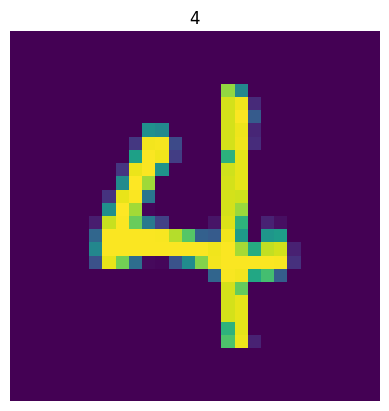

In [65]:
for im, label in dataloader_test :
    break

plt.imshow(im[0,0])
plt.title(label[0].item())
plt.axis("off")
plt.show()

## Création de notre modèle de Deep Learning

Pytorch permet de créer nos propres réseaux de neurones mais aussi d'utiliser des réseaux de neurones pré-entraînés (https://pytorch.org/vision/stable/models.html). Dans notre cas, nous allons créer notre propre modèle, afin de savoir comment faire.

In [44]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Il faut définir une classe issue de torch.nn.Module. La fonction forward est celle qui est utilisée lors de la prédiction, il faut donc coder ici les opérations, avec un tensor 'x' en input. La fonction __init__ permet de définir nos différentes couches. Nous utilisons des couches de convolution et dense, qui sont expliquées dans la documentation si besoin.

In [68]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # couche de convolution avec un kernel size de 5 et 10 filtres en sortie (va diminuer de 5-1=4 les dimensions spatiales)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # couche de convolution avec un kernel size de 5 et 20 filtres en sortie (va diminuer de 5-1=4 les dimensions spatiales)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        # couche fully connected, qui a 320 neurones en entrée et 50 en sortie
        self.fc1 = nn.Linear(320, 50)
        # couche fully connected, qui a 50 neurones en entrée et 10 en sortie
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # la max pool va prendre la valeur maximal dans un rayon de 2 (ici)
        # la fonction relu renvoie x si x > 0 sinon 0. C'est une façon d'introduire de la non-linéarité
        # (N, 1, 28, 28) -> (N, 10, 24, 24) -> (N, 10, 12, 12)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # (N, 10, 12, 12) -> (N, 20, 8, 8) -> (N, 20, 4, 4)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        # on va flatten le tensor (en gardant la dimension de batch)
        # (N, 20, 4, 4) -> (N, 20*4*4) = (N, 320)
        x = x.view(-1, 320)
        # (N, 320) -> (N, 50)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        # (N, 50) -> (N, 10)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

Nous pouvons alors créer le modèle et on lui assigne un optimizer, qui s'occupera d'appliquer la backpropagation du gradient lors de l'entraînement.

In [69]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=1e-3)

Regardons une prédiction du modèle.

In [71]:
pred = network(torch.rand((1,1,28,28)))
pred

tensor([[-2.5129, -2.2959, -2.4293, -2.3297, -2.2793, -2.1930, -2.1753, -2.1633,
         -2.3242, -2.3799]], grad_fn=<LogSoftmaxBackward0>)

Nous avons fourni un tensor de la bonne taille et nous obtenons aucunes erreurs et la sortie est bien de taille (N, 10). Nous allons interpréter chaque valeur comme une probabilité d'appartenir à la classe. Après l'entrainement, nous pourrons alors choisir la classe avec la probabilité la plus grande.

## Entrainement

Lors de l'entrainement, nous allons pour plusieurs epochs, faire voir le set d'entraînement à notre modèle pour qu'il s'entraîne, et mesurer ses performances sur le test set.
Nous allons tout d'abord devoir définir une métrique et une fonction de perte. La métrique sera simplement l'accuracy et la fonction de perte sera la crossEntropy, très utilisée pour tous les problèmes de classification.
Nous allons aussi définir d'autres paramètres : 
- epochs : nombre de fois que le modèle va voir toutes les données
- batchsize : nombre d'images à chaque itération (on l'a déjà fixé à 16)
- device : indique si on est sur GPU ou non

On va ensuite définir deux fonctions, train et test, qui seront appelées à chaque epoch.
La fonction train va entraîner le modèle sur le set d'entraînement et la fonction test va le tester sur le set de test, pour mesurer ses performances.

In [94]:
loss = torch.nn.CrossEntropyLoss()
epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def train(epoch):
    losses = []
    accuracies = []
    network.train()
    # parcourons tout le set
    for batch_idx, (data, target) in enumerate(dataloader_train):
        data, target = data.to(device), target.to(device)
        # on reset le gradient
        optimizer.zero_grad()
        # on fait la prédiction
        output = network(data)
        # on calcul la loss associée
        l = loss(output, target)
        # on fait la backpropagation
        l.backward()
        optimizer.step()
        # trouver la classe prédite (celle avec la plus grosse probabilité)
        pred = torch.argmax(output, dim=1)

        losses.append(l.item())
        accuracies.append(100 * (pred==target).sum() / pred.shape[0])
    
    print("Epoch : {} (train) - Loss : {:.2f} - Accuracy : {:.2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

    return np.mean(losses), np.mean(accuracies)

def test(epoch):
    losses = []
    accuracies = []
    # evaluation mode (ignore some things, like the dropout)
    network.eval()
    # parcourons tout le set
    for batch_idx, (data, target) in enumerate(dataloader_test):
        data, target = data.to(device), target.to(device)
        # on fait la prédiction
        output = network(data)
        # on calcul la loss associée
        l = loss(output, target)
        # trouver la classe prédite (celle avec la plus grosse probabilité)
        pred = torch.argmax(output, dim=1)

        losses.append(l.item())
        accuracies.append(100 * (pred==target).sum() / pred.shape[0])
    
    print("Epoch : {} (test) - Loss : {:.2f} - Accuracy : {:.2f}".format(epoch, np.mean(losses), np.mean(accuracies)))
    
    return np.mean(losses), np.mean(accuracies)

cpu


In [ ]:
# met le modèle sur le device
network = network.to(device)
# de quoi storer les métriques
loss_train = []
acc_train = []
loss_test = []
acc_test = []

for i in range(epochs) :
    l, acc = train(i)
    loss_train.append(l)
    acc_train.append(acc)
    l, acc = test(i)
    loss_test.append(l)
    acc_test.append(acc)

# Sauvegardons le modèle
torch.save(network.state_dict(), './model_final.pth')

Maintenant que le modèle est entraîné, nous allons pouvoir regarder les courbes d'entraînement. Cela permet de voir si le modèle a été entraîné assez/trop longtemps. Cela permet aussi de voir l'évolution des métriques et de détecter quelques erreurs parfois. Cela permet de résumer l'entraînement et d'avoir des graphes plus rapidement compréhensibles que juste des lignes de chiffres. On peut voir ici que les courbes d'entraînement sont moins performantes. On pourrait alors augmenter le nombre d'epochs et espérer voir des performances plus importantes.

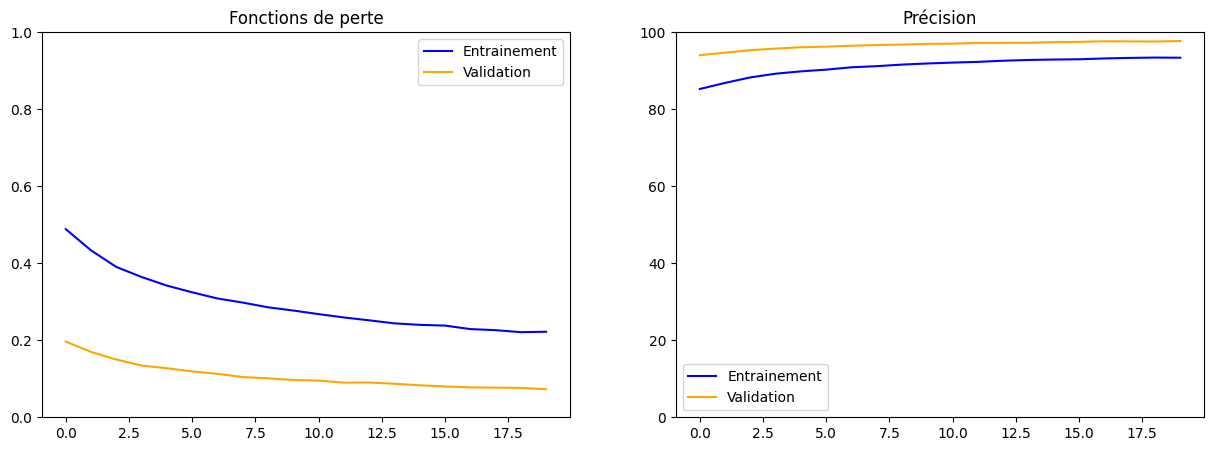

In [102]:
plt.figure(figsize=(15,5))
# plot pour les loss
plt.subplot(1,2,1)
plt.plot(range(epochs), loss_train, color="blue", label="Entrainement")
plt.plot(range(epochs), loss_test, color="orange", label="Validation")
plt.legend()
plt.ylim(0,1)
plt.title("Fonctions de perte")
plt.subplot(1,2,2)
plt.plot(range(epochs), acc_train, color="blue", label="Entrainement")
plt.plot(range(epochs), acc_test, color="orange", label="Validation")
plt.legend()
plt.title("Précision")
plt.ylim(0,100)
plt.show()

### Test du modèle

Bien que nous ayons des métriques qui semblent performantes, il faut toujours vérifier si les résultats visuels le sont aussi. Nous allons donc considérer le set de test et afficher les images ainsi que la classe prédite/vérité.

Avant cela, il faut cependant charger le modèle que nous avons entraîné.

In [104]:
network = Net()
# maintenant il faut lui ajouter les poids de l'entraînement
network.load_state_dict(torch.load("model_final.pth"))
# on le met dans le device
network = network.to(device)

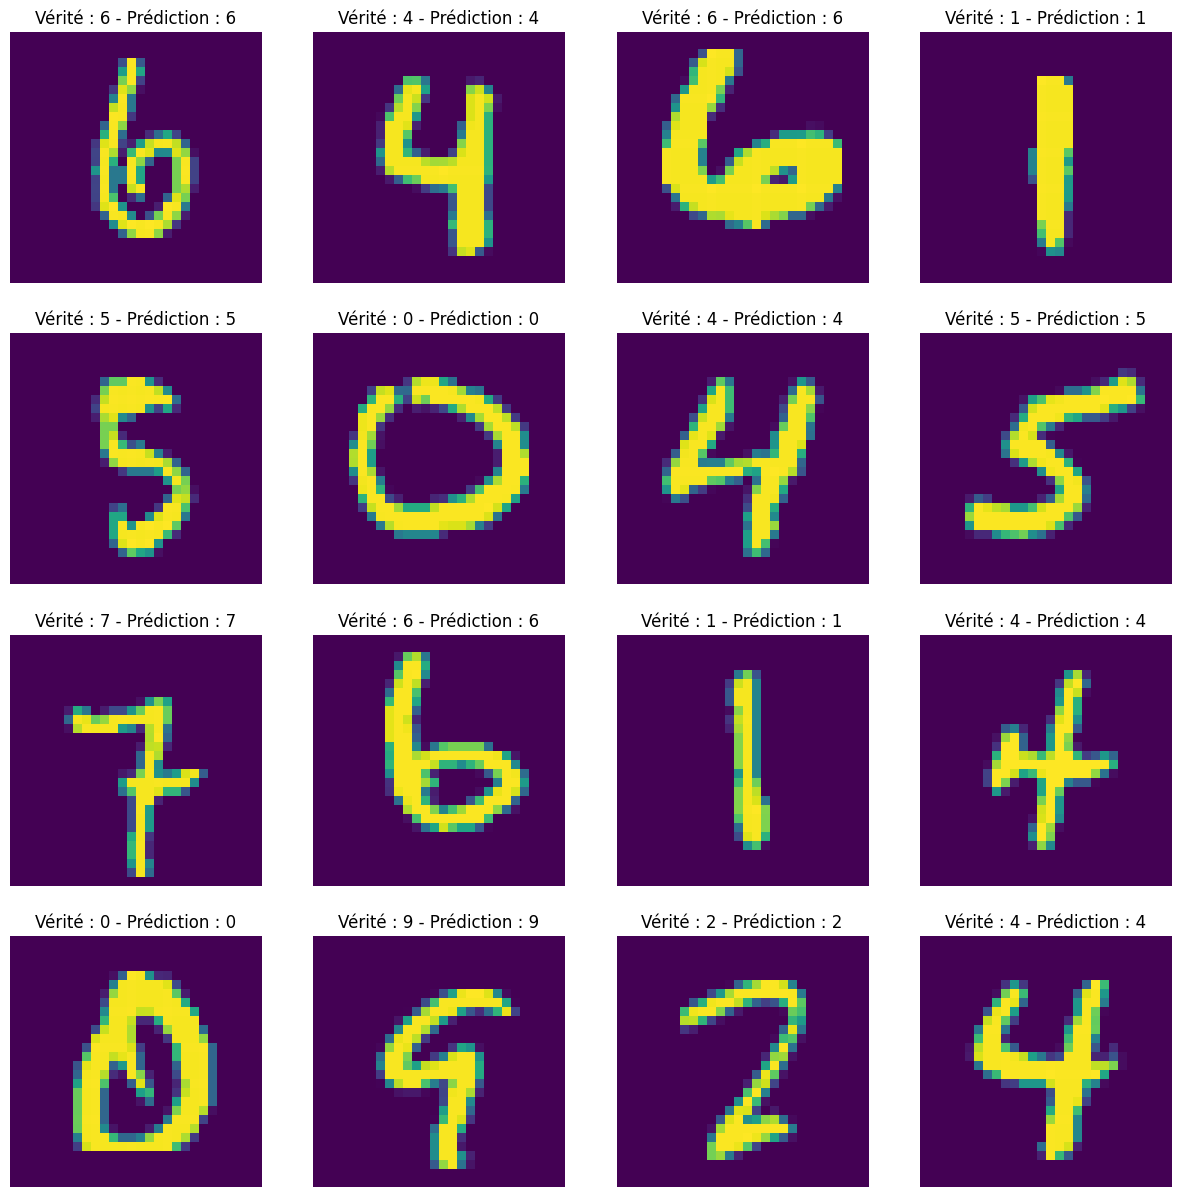

In [107]:
plt.figure(figsize=(15,15))

for batch_idx, (data, target) in enumerate(dataloader_test):
    data = data.to(device)
    # on fait la prédiction
    output = network(data)
    # on les remet sur le cpu
    data = data.to("cpu")
    output = output.to("cpu")
    # on prend la classe avec la meilleure probabilité
    pred = torch.argmax(output, dim=1)

    for i in range(16) :
        plt.subplot(4,4,i+1)
        plt.imshow(data[i, 0])
        plt.title("Vérité : {} - Prédiction : {}".format(target[i].item(), pred[i].item()))
        plt.axis('off')

    plt.show()
    break


On peut alors voir que les prédictions sont très bonnes avec très peu d'erreurs, ce qui est conforme avec nos métriques. 

Nous avons alors vu comment load des datasets déjà présents sur Pytorch, créer un modèle personalisé et entrainer un modèle.
Il ne manque plus qu'à savoir créer un dataset personnel ce qui est faisable en suivant la documentation et à load un modèle connu et pré-entrainé, ce qui est encore plus simple que de faire le sien (en une ligne). La documentation pour un dataset custom est disponible ici (https://pytorch.org/tutorials/beginner/data_loading_tutorial.html). Mais il sera aussi présenté dans les tutoriels suivants.